## Importing Library

 - Several key libraries used for this assigment includes:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Load Dataset

In [2]:
df = pd.read_csv('Telcom.csv')
pd.set_option('display.max_columns', None)
df.head(6)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes


## Data Insight

In [3]:
df.shape

(7043, 21)

 - Dataset comprises of 7043 observations and 21 characteristics.<br>

Dataset Explanation 
 - The dataset is dominated mostly by categorical information. As of now, the only numerical variables consist of only 5, while the rest are categorical.
 - There are couple of grouping of different types of measurement and understanding them better will help us learn the data aswell.
 - Subscriber's information, the brief information about the subcriber. For example: CustomerID, gender, SeniorCitizen, Partner, Dependents. and tenure period.
 - The type of service the company provides- PhoneService, MultipleLines, InternetService.
 - The Additional features / bundle added into the services they provide - OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV and  StreamingMovies.
 - Subscribers setup and annual bill for the services - Contract, PaperlessBilling, PaymenMethod.MonthlyCharges and totalCharges.
 - The last is Churn, refers to a condition where a subscribers ever cancelled or stop using the service.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


 - Dataset is dominated by object Dtype with total of 18 variables, while the rest 3 variables are integer and float. <br>
 - No missing values (null) found on all of the variables.

Double-checking for Null / Missing values from Dataset, sorting data based on the integer or float variables.

In [5]:
missing_data = df.isna().sum(axis=0).reset_index()
missing_data.columns = ['Variable', 'Missing values']
missing_data['Filling factor (%)']=(df.shape[0]-missing_data['Missing values'])/df.shape[0]*100
missing_data.sort_values('Filling factor (%)').reset_index(drop = True)

,Variable,Missing values,Filling factor (%)
0,customerID,0,100.0
1,MonthlyCharges,0,100.0
2,PaymentMethod,0,100.0
3,PaperlessBilling,0,100.0
4,Contract,0,100.0
5,StreamingMovies,0,100.0
6,StreamingTV,0,100.0
7,TechSupport,0,100.0
8,DeviceProtection,0,100.0
9,TotalCharges,0,100.0


 - Filling factor of all of the variables are 100 %
 - No NA value detected from Dataset

Cross-checking Missing value by sorting based on a certain variable
 - tenure variable is chosen.

In [6]:
p = df.sort_values(by = ['tenure'])
p.head(16)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
6754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No


 - Dataset above shows first 11 rows in the TotalCharges variables are filled with blank space. This suggest that it is indeed has missing value. <br>
 - Data cleaning process needs to be performed.

## Data Cleaning

This process can be done by simply filling the blank space in the variable by 0. Here we use the simplest form of function, lambda to apply that 0 value to the blank space. 

In [7]:
df['TotalCharges'] = df['TotalCharges'].apply(lambda x : 0 if x == ' ' else x)

Check to see if the blank space has been replaced by 0.

In [8]:
m = df.sort_values(by=['TotalCharges'])
m.head(16)

TypeError: '<' not supported between instances of 'str' and 'int'

 - Giving the error code shown above. Here we must check first if the datatype of the TotalCharges variable has been assigned properly.

Checking Dtype of the dataset.


In [9]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

 - Clearly shown TotalCharges is a string type, we have to change it to either integer or float.

In [10]:
df['TotalCharges'] = df['TotalCharges'].astype(float)
m = df.sort_values(by=['TotalCharges'])
m.head(16)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.00,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.00,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.00,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.00,No
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.00,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.00,No
6754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,0.00,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.00,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.00,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.00,No


 - The blank spaces on the TotalCharges variable have now been replaced by 0's

## Categorical Data Encoding

Implied above, we know that much of the dataset's variable are predominantly in string type. As such, it is much more useful and easier if we group them using this method.

In [ ]:
df.drop('customerID', axis=1, inplace=True) # we are dropping this variable,
# otherwise the data will be much much larger.
df_dummy = pd.get_dummies(df)
df_dummy.head(11)

## Summary Statistics

In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


 - Mean value in SeniorCitizen, tenure and TotalCharges is higher than the median value represented by the 50%(50th percentile), while for MonthlyCharges it is the other way around.
 - Notably, there's a masisve gap difference between 75th percentile and the max value specificly in TotalCharges.
 - From the observation, it is understood that perhaps there are outliers value in dataset.

## Data Visualization

Checking for missing value using seaborne heatmap.

<AxesSubplot:>

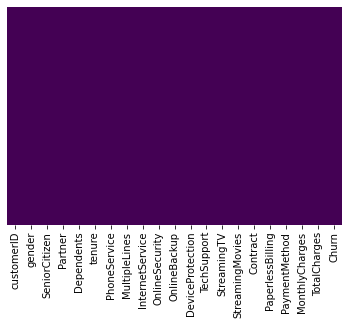

In [12]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

 - Doubling-down that there are no missing values detected in dataset.
 - If there were any, we would've noticed in the figure represented by different shade of purple in the background.

Checking for correlation available from dataset.

<AxesSubplot:>

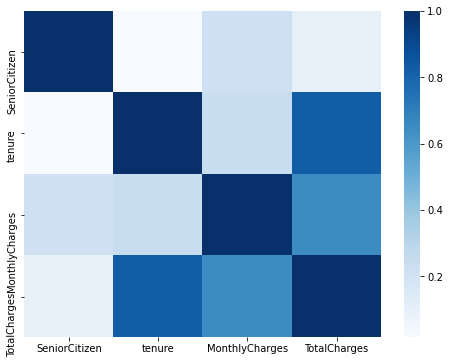

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),cmap='Blues',annot=False) 

 - Dark shades represents positive correlation, while light shades represents negative correlation.
 - Here we can infer that tenure and TotalCharges have quite the strong positive correlation.
 - If we set annot=True, we'll get values by which features are correlated to each other in grid-cells.

<AxesSubplot:>

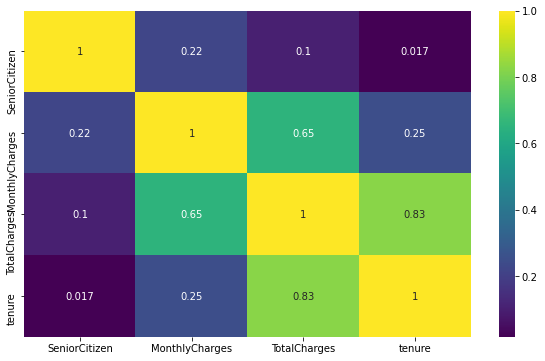

In [14]:
k = 4 #number of variables for heatmap
cols = df.corr().nlargest(k, 'SeniorCitizen')['SeniorCitizen'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

 - We can actually confirm that tenure and Total Charges have a strong positive correlation with a value of 0.83.
 - TotalCharges and SeniorCitizen have almost no correlation with a value of only 0.1.

## Checking Outliers From Dataset

Checking and determining data outliers for each of the SeniorCitizen, tenure, MonthlyCharges and TotalCharges variable using IQR, 25th %tile and 75th %tile calculation. 

In [15]:
# SeniorCitizen
Q1_1 = df['SeniorCitizen'].quantile(0.25)
Q3_1 = df['SeniorCitizen'].quantile(0.75)
IQR_1 = Q3_1 - Q1_1
LW_1 = Q1_1 - 1.5*IQR_1
UB_1 = Q3_1 + 1.5*IQR_1
OL_1 = ((df['SeniorCitizen'] < LW_1) | (df['SeniorCitizen'] > UB_1)).sum()

###

#tenure
Q1_2 = df['tenure'].quantile(0.25)
Q3_2 = df['tenure'].quantile(0.75)
IQR_2 = Q3_2 - Q1_2
LW_2 = Q1_2 - 1.5*IQR_2
UB_2 = Q3_2 + 1.5*IQR_2
OL_2 = ((df['tenure'] < LW_2) | (df['tenure'] > UB_2)).sum()

###

#MonthlyCharges
Q1_3 = df['MonthlyCharges'].quantile(0.25)
Q3_3 = df['MonthlyCharges'].quantile(0.75)
IQR_3 = Q3_3 - Q1_3
LW_3 = Q1_3 - 1.5*IQR_3
UB_3 = Q3_3 + 1.5*IQR_3
OL_3 = ((df['MonthlyCharges'] < LW_3) | (df['MonthlyCharges'] > UB_3)).sum()

###

#TotalCharges
Q1_4 = df['TotalCharges'].quantile(0.25)
Q3_4 = df['TotalCharges'].quantile(0.75)
IQR_4 = Q3_4 - Q1_4
LW_4 = Q1_4 - 1.5*IQR_4
UB_4 = Q3_4 + 1.5*IQR_4
OL_4 = ((df['TotalCharges'] < LW_4) | (df['TotalCharges'] > UB_4)).sum()

###

# Creating Outliers Dataframe 
df_outliers = pd.DataFrame({'Variables' : ['SeniorCitizen','tenure','MonthlyCharges','TotalCharges'],
                           '25th %tile' : [Q1_1,Q1_2,Q1_3,Q1_4],
                           '75th %tile' : [Q3_1,Q3_2,Q3_3,Q3_4],
                           'IQR' : [IQR_1,IQR_2,IQR_3,IQR_4],
                           'Lower Bound' : [LW_1,LW_2,LW_3,LW_4],
                           'Upper Bound' : [UB_1,UB_2,UB_3,UB_4],
                           'Outliers count' : [OL_1,OL_2,OL_3,OL_4]})
df_outliers

,Variables,25th %tile,75th %tile,IQR,Lower Bound,Upper Bound,Outliers count
0,SeniorCitizen,0.00,0.00,0.00,0.000,0.000,1142
1,tenure,9.00,55.00,46.00,-60.000,124.000,0
2,MonthlyCharges,35.50,89.85,54.35,-46.025,171.375,0
3,TotalCharges,398.55,3786.60,3388.05,-4683.525,8868.675,0


 - Except for SeniorCitizen there are no outliers found in all of the variables of the dataset.
 - Note, we may want to further look into SeniorCitizen as numbers displayed by the variable is seemingly odd.

Checking every and how many unique values there are in SeniorCitizen.

In [16]:
print(df.SeniorCitizen.unique())
print(df.SeniorCitizen.value_counts())

[0 1]
0    5901
1    1142
Name: SeniorCitizen, dtype: int64


 - Now it is understood why the displayed numbers from SeniorCitizen is odd, it only has 2 unique values, all of which are integer.
 - The SeniorCitizen should be of categorical data, as it only has two values '0' and '1'.
 - Next is transforming this variable into a string type value, also replacing the both value of '0' and '1' to 'No' and 'Yes' 

Transforming SeniorCitizen variable. 

In [17]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype(object)

Replacing the value with a 'Yes' and 'No'.

In [18]:
df['SeniorCitizen'] = df['SeniorCitizen'].replace([0,1],['No','Yes'])
df.head(16)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,No,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,No,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


 - The values have been replaced with 'Yes' and 'No'
 - Cross-checking to see if its properly changed. 

In [19]:
print(df.SeniorCitizen.unique())
print(df.SeniorCitizen.value_counts())

['No' 'Yes']
No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64


## Running Summary Statistic Again

In [20]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


 - The Dataset has been properly cleaned.